<a href="https://colab.research.google.com/github/ENKI0311/8_Years_of_Ethereum_Enhanced/blob/main/8_Years_of_Ethereum_Enhanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

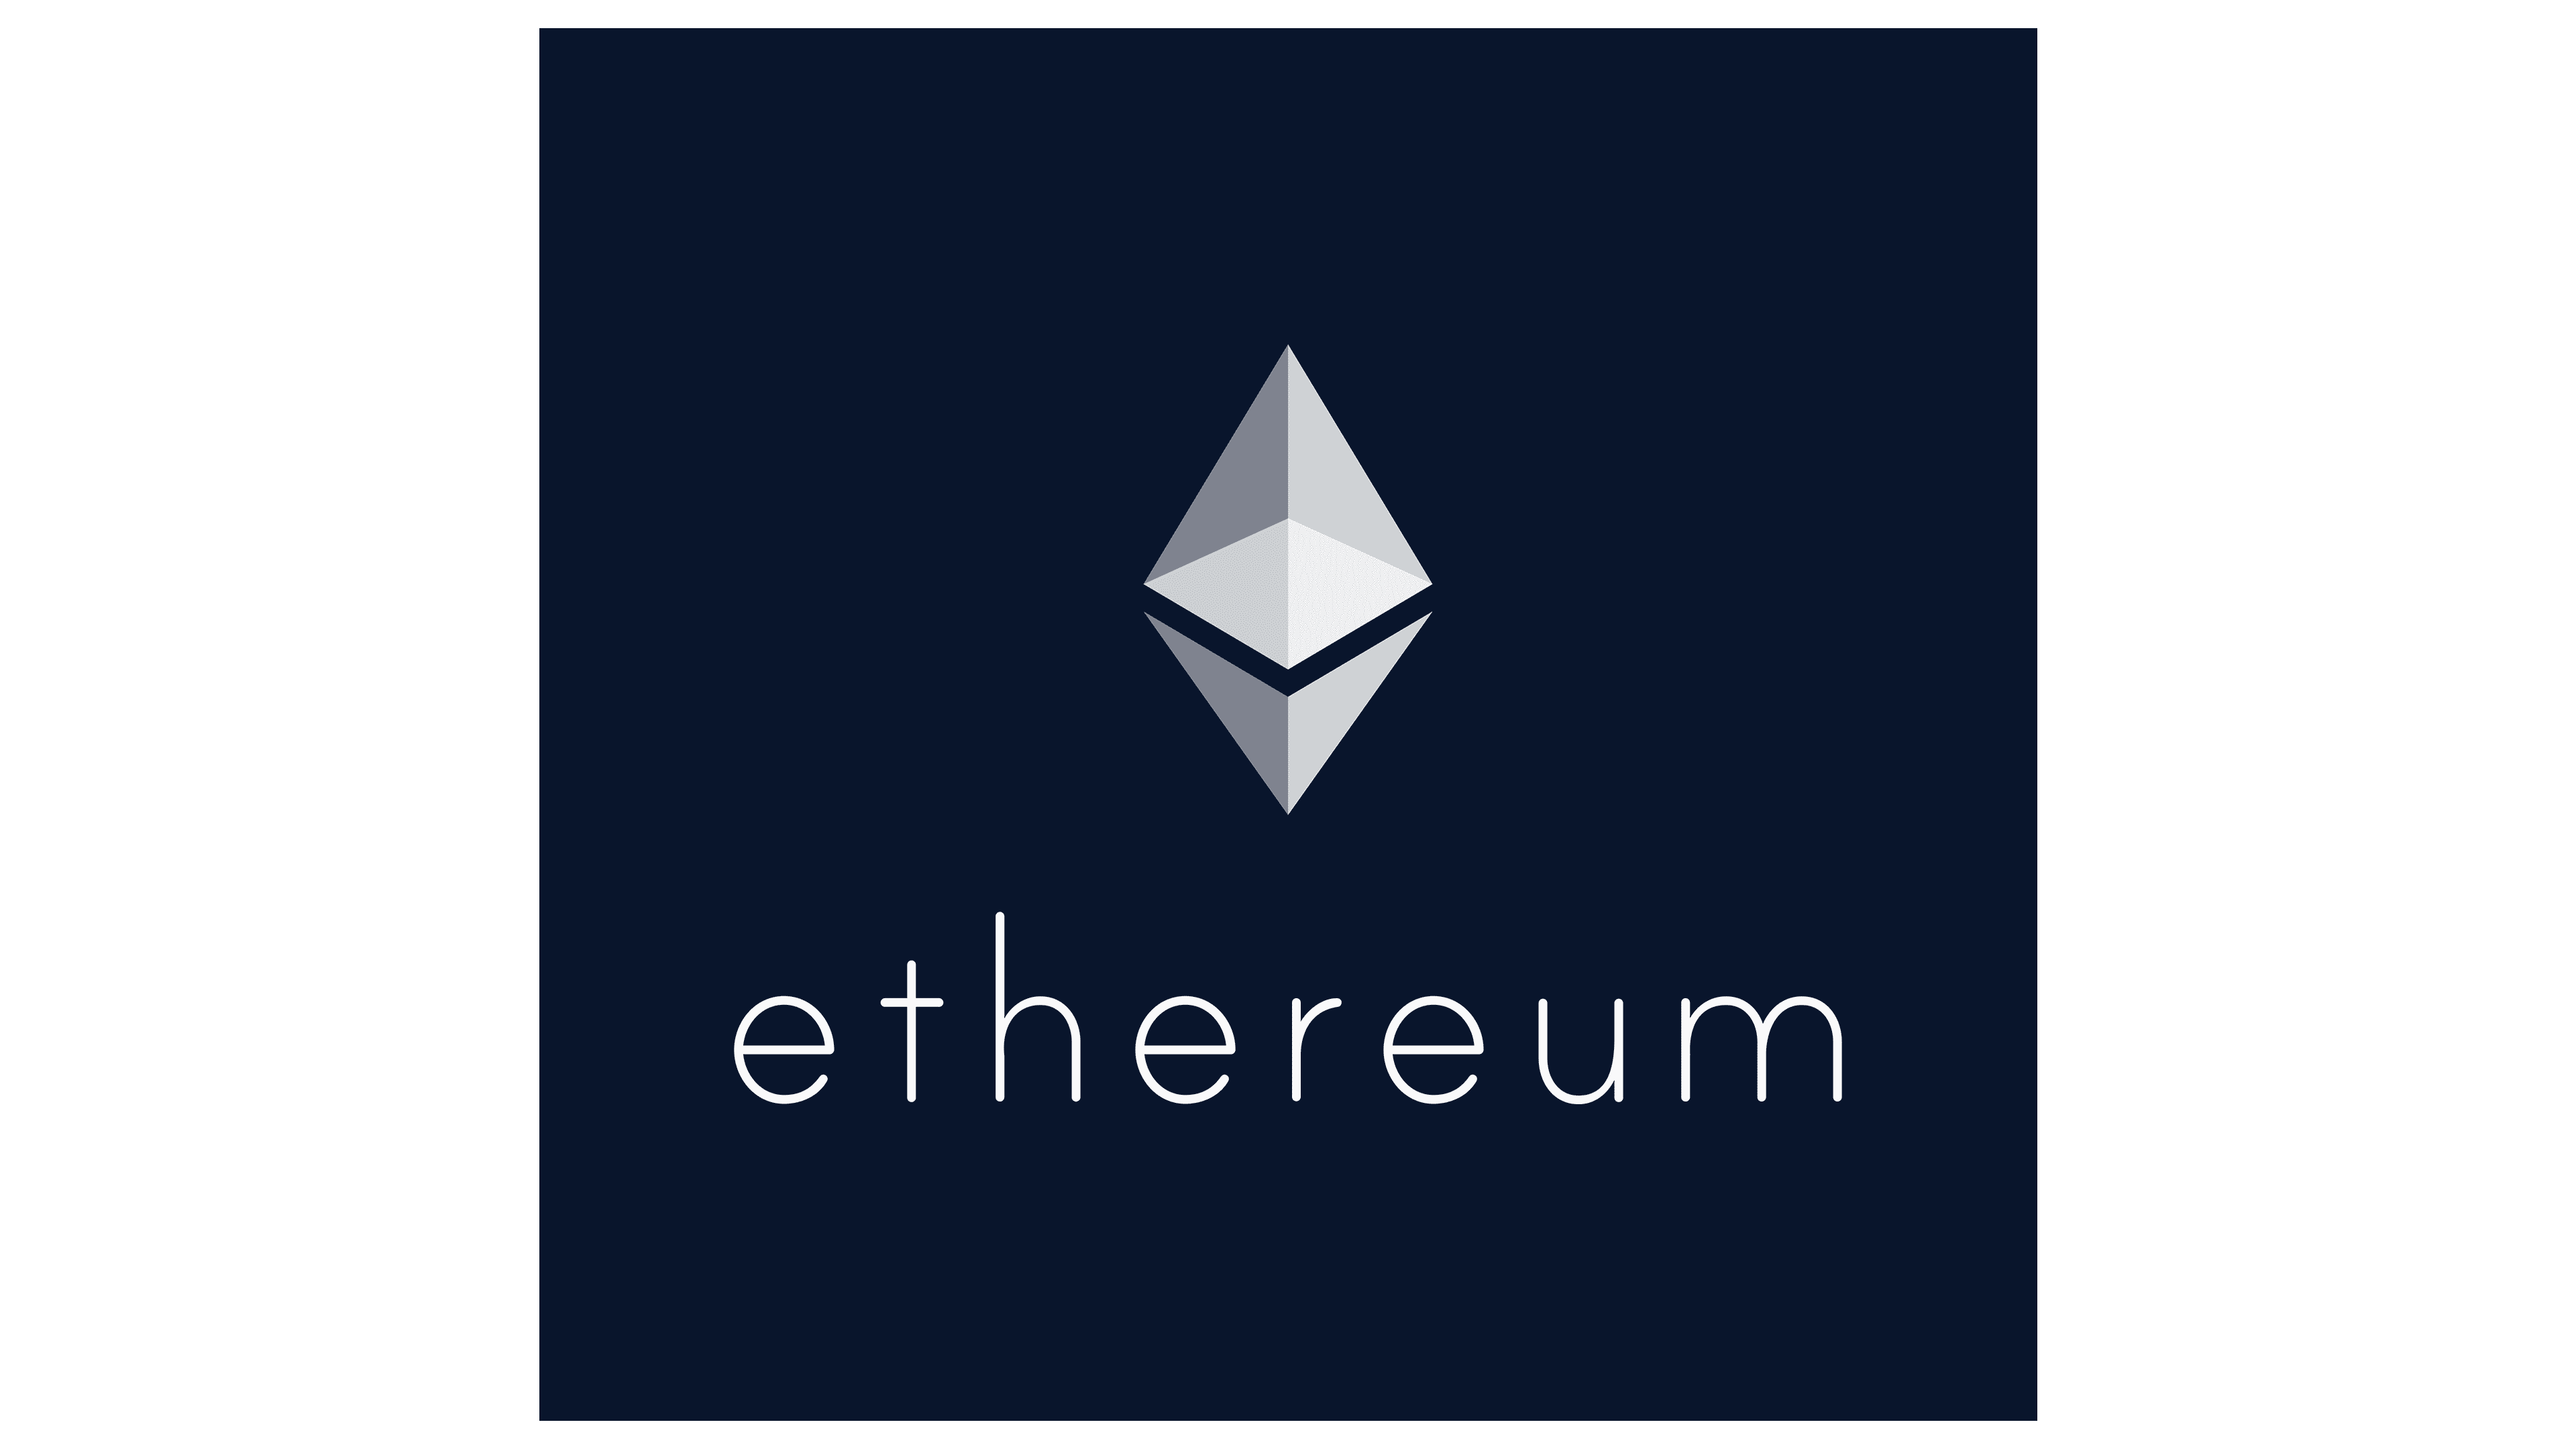

# 8 Years of Ethereum


---








Introduction to "8 Years of Ethereum"
Ethereum, since its inception in 2015, has emerged as a pivotal technology in the blockchain and cryptocurrency space. This Jupyter notebook aims to delve into an eight-year journey of Ethereum, exploring its evolution, technological advancements, and its impact on the world of decentralized applications and finance.

Objectives
In this analysis, we will:

Examine Ethereum's Growth: We will look at various metrics such as the number of transactions, smart contract deployments, and network usage to understand Ethereum's growth trajectory over the years.

Analyze Technological Milestones: Ethereum has undergone significant updates and shifts, such as the transition to Ethereum 2.0. We will explore these milestones and their implications.

Assess Market Impact: Understanding how Ethereum has influenced the cryptocurrency market and the broader financial ecosystem will be a key focus.

Data and Methodology
Our analysis is grounded in data collected from various reliable sources over the past eight years. This includes transaction data, network statistics, and market performance metrics. The methodology involves a combination of data visualization, statistical analysis, and machine learning techniques to uncover patterns and insights.

Significance
Ethereum's journey is not just about a cryptocurrency but about how it has pioneered the concept of a programmable blockchain, leading to innovations like decentralized finance (DeFi) and non-fungible tokens (NFTs). This study aims to provide a comprehensive understanding of Ethereum's role in shaping the digital asset landscape

---




By: John Chilton

---



# Loading the Libararies

In [1]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [92]:
import yfinance as yf
import datetime

# Define the ticker symbol for Ethereum
ticker_symbol = "ETH-USD"

# Define the time period: 8 years from today
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=365 * 8)

try:
    # Use yfinance to download the data
    ethereum_data = yf.download(ticker_symbol, start=start_date, end=end_date, progress=True)

    # Save the data to a CSV file
    ethereum_data.to_csv('/content/drive/MyDrive/lab_mount/ethereum_data_8_years.csv')

    # Display the first few rows of the dataset for confirmation
    print(ethereum_data.head())

except Exception as e:
    print(f"An error occurred: {e}")


[*********************100%***********************]  1 of 1 completed

              Open    High     Low   Close  Adj Close      Volume
Date                                                             
2017-11-09 308.645 329.452 307.056 320.884    320.884   893249984
2017-11-10 320.671 324.718 294.542 299.253    299.253   885985984
2017-11-11 298.586 319.453 298.192 314.681    314.681   842300992
2017-11-12 314.690 319.153 298.513 307.908    307.908  1613479936
2017-11-13 307.025 328.415 307.025 316.716    316.716  1041889984


In [93]:
df = pd.read_csv('/content/drive/MyDrive/lab_mount/ethereum_data_8_years.csv')



1.   Observations
2.   Sanity Checks



In [94]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.645,329.452,307.056,320.884,320.884,893249984
1,2017-11-10,320.671,324.718,294.542,299.253,299.253,885985984
2,2017-11-11,298.586,319.453,298.192,314.681,314.681,842300992
3,2017-11-12,314.690,319.153,298.513,307.908,307.908,1613479936
4,2017-11-13,307.025,328.415,307.025,316.716,316.716,1041889984
5,2017-11-14,316.763,340.177,316.763,337.631,337.631,1069680000
6,2017-11-15,337.964,340.912,329.813,333.357,333.357,722665984
7,2017-11-16,333.443,336.159,323.606,330.924,330.924,797254016
8,2017-11-17,330.167,334.964,327.523,332.394,332.394,621732992
9,2017-11-18,331.980,349.616,327.687,347.612,347.612,649638976


In [6]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
2487,2024-08-31,2525.859,2532.390,2493.706,2513.394,2513.394,6646876013
2488,2024-09-01,2513.424,2515.467,2401.889,2427.902,2427.902,11800443265
2489,2024-09-02,2427.973,2563.086,2426.096,2538.187,2538.187,12520444224
2490,2024-09-03,2538.161,2552.803,2419.875,2420.604,2420.604,11406800197
2491,2024-09-04,2420.192,2488.917,2313.265,2448.977,2448.977,16709600747
2492,2024-09-05,2448.987,2465.385,2348.863,2367.738,2367.738,13632325040
2493,2024-09-06,2367.701,2406.512,2150.863,2223.876,2223.876,25825618367
2494,2024-09-07,2223.929,2310.195,2222.101,2274.107,2274.107,11124608320
2495,2024-09-08,2274.438,2332.359,2243.911,2297.293,2297.293,10718443487
2496,2024-09-09,2297.896,2379.787,2274.115,2358.482,2358.482,15887712451


In [7]:
df.shape

(2497, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2497 non-null   object 
 1   Open       2497 non-null   float64
 2   High       2497 non-null   float64
 3   Low        2497 non-null   float64
 4   Close      2497 non-null   float64
 5   Adj Close  2497 non-null   float64
 6   Volume     2497 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 136.7+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2497.000,1423.328,1206.350,84.280,249.335,1269.420,2231.393,4810.071
High,2497.000,1462.459,1238.441,85.343,261.018,1300.746,2294.608,4891.705
Low,2497.000,1380.058,1169.872,82.830,242.484,1238.688,2160.358,4718.039
Close,2497.000,1423.964,1205.973,84.308,249.474,1271.654,2231.733,4812.087
Adj Close,2497.000,1423.964,1205.973,84.308,249.474,1271.654,2231.733,4812.087
Volume,2497.000,12425730627.431,9988412169.734,621732992.000,5292172429.000,10170414304.000,16872482726.000,84482912776.000


In [10]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [11]:
df.duplicated().sum()

0

In [14]:
df.mode()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,205.174,1919.264,1564.032,3156.510,3156.510,621732992
1,2017-11-10,NaN,NaN,NaN,NaN,NaN,649638976
2,2017-11-11,NaN,NaN,NaN,NaN,NaN,722665984
3,2017-11-12,NaN,NaN,NaN,NaN,NaN,797254016
4,2017-11-13,NaN,NaN,NaN,NaN,NaN,800819008
...,...,...,...,...,...,...,...
2492,2024-09-05,NaN,NaN,NaN,NaN,NaN,67610826680
2493,2024-09-06,NaN,NaN,NaN,NaN,NaN,67668132244
2494,2024-09-07,NaN,NaN,NaN,NaN,NaN,69023382175
2495,2024-09-08,NaN,NaN,NaN,NaN,NaN,78398214539


In [16]:
# Checking the summary of the categorical features in the dataset
df.describe(include=["object"]).T

,count,unique,top,freq
Date,2497,2497,2024-09-09,1


In [17]:
# Looping through each column in the DataFrame that has an object data type
for i in df.describe(include=["object"]).columns:
    # Printing the name of the column
    print("Unique values in", i, "are :")
    # Printing the count of unique values in the column
    print(df[i].value_counts())
    # Printing a separator line of asterisks for better readability
    print("*" * 50);

Unique values in Date are :
Date
2024-09-09    1
2024-08-01    1
2024-08-02    1
2024-08-03    1
2024-08-04    1
             ..
2017-11-13    1
2017-11-14    1
2017-11-15    1
2017-11-16    1
2017-11-17    1
Name: count, Length: 2497, dtype: int64
**************************************************


In [58]:
# Remove the column 'Open'
df.drop('Open', axis=1, inplace=True)

In [19]:
# Remove the column 'Close'
df.drop('Close', axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [59]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [60]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [61]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [62]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

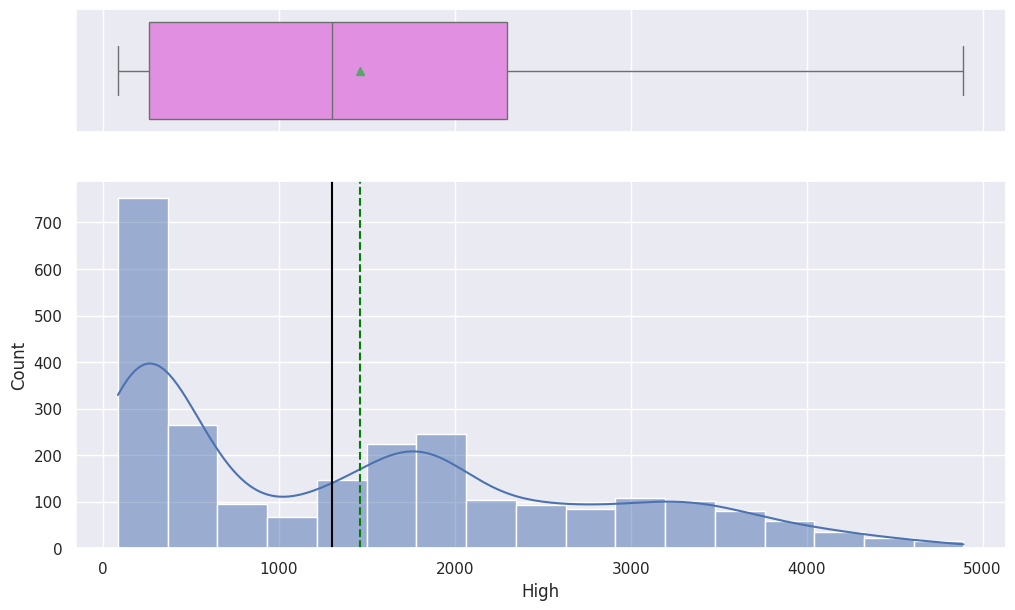

In [63]:
# Histogram and Boxplot of High
histogram_boxplot(df, "High", kde=True);

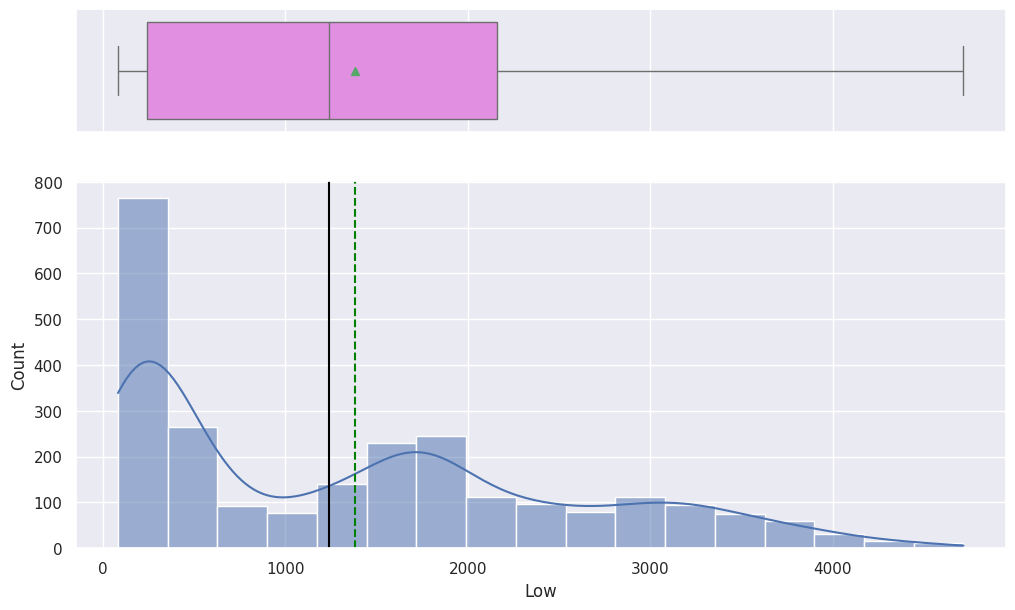

In [64]:
# Histogram and Boxplot of Low
histogram_boxplot(df, "Low", kde=True);

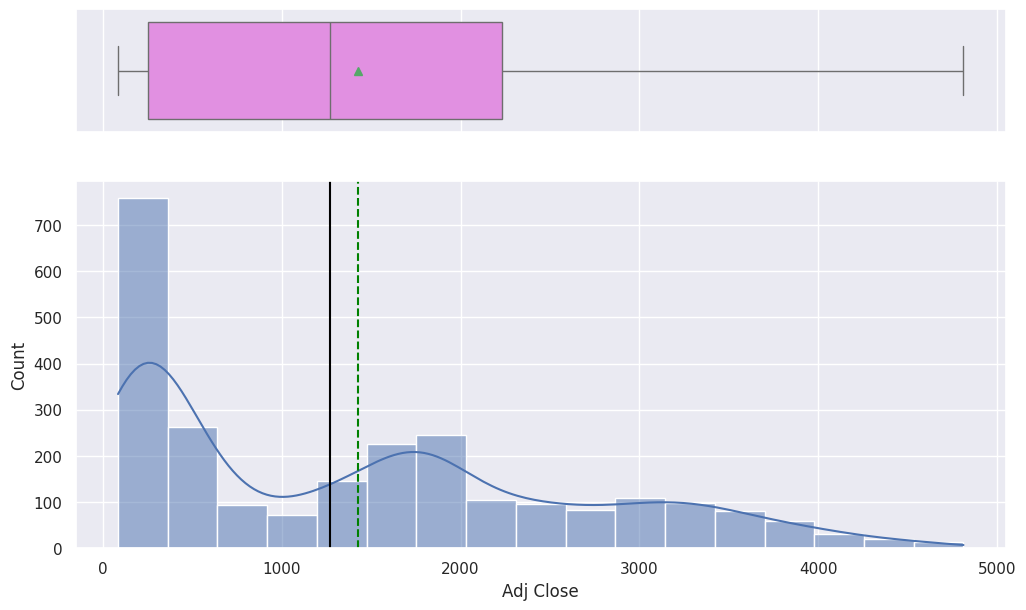

In [65]:
# Histogram and Boxplot of Adj Close
histogram_boxplot(df, "Adj Close", kde=True);

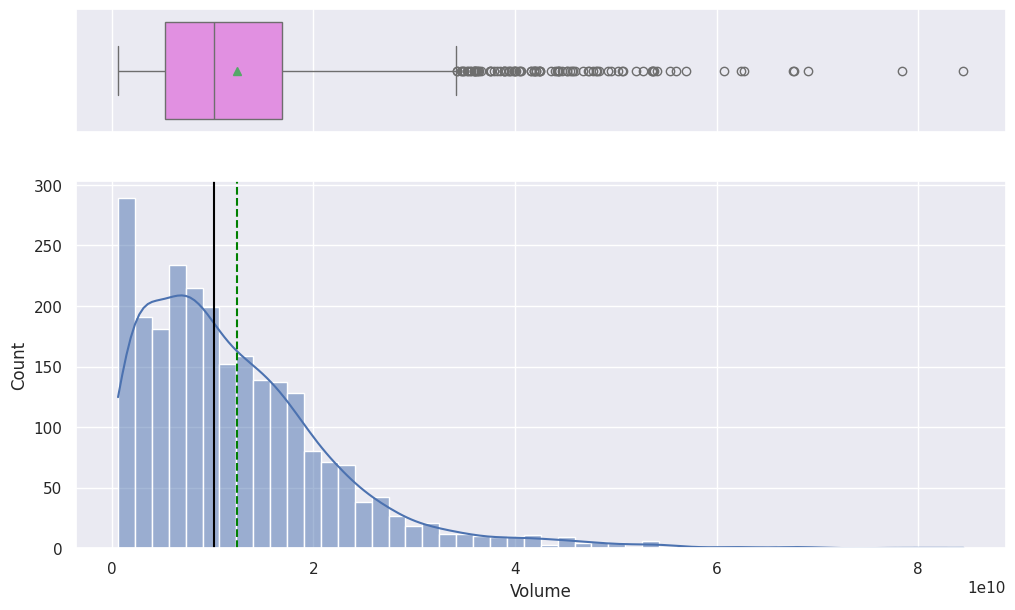

In [66]:
# Histogram and Boxplot of Volume
histogram_boxplot(df, "Volume", kde=True);

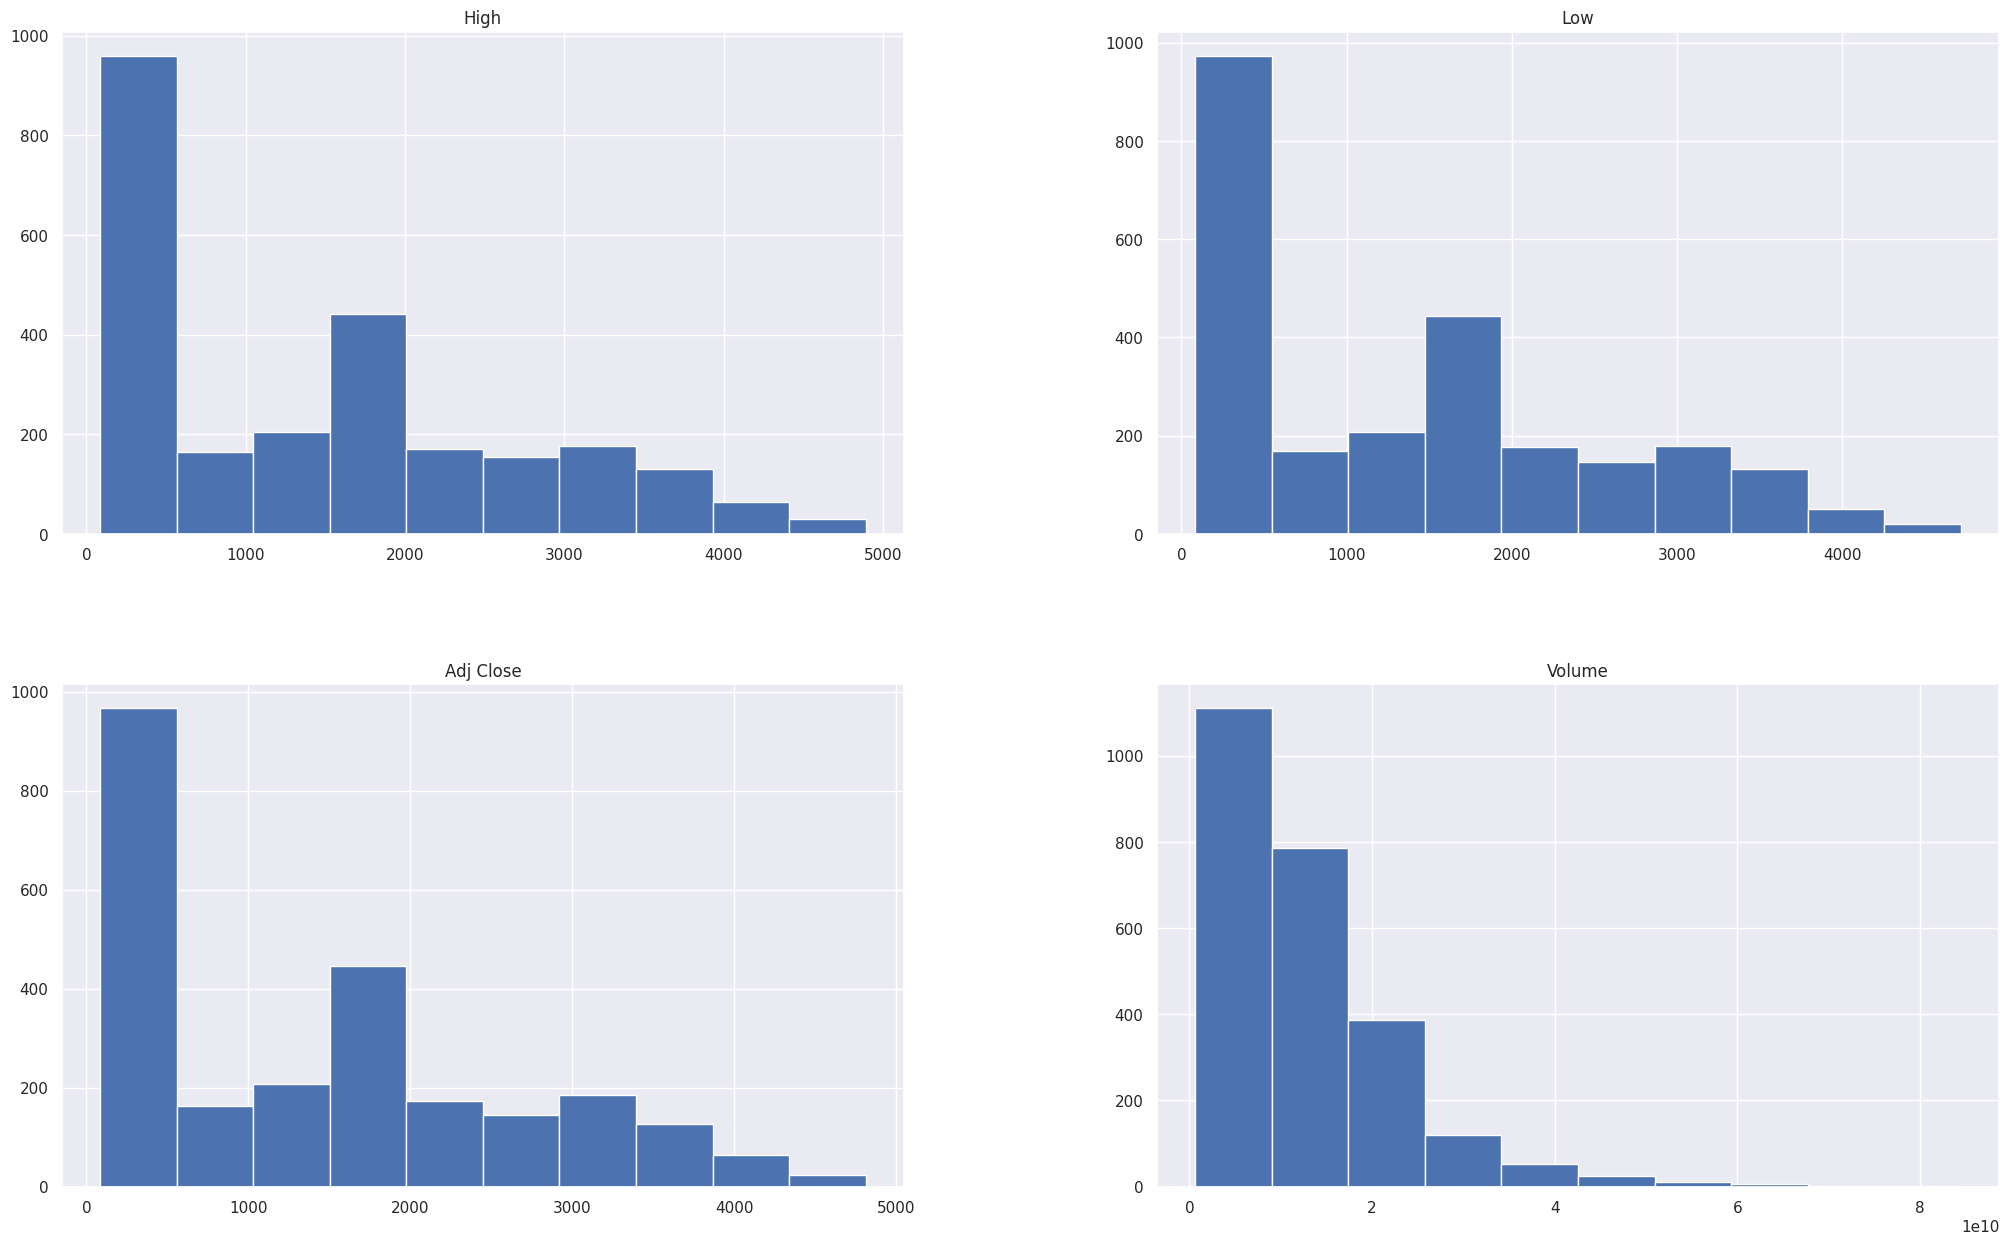

In [67]:
# Histogram of the data
df.hist(figsize=(25,15))
plt.show();

### Bivariate Distributions

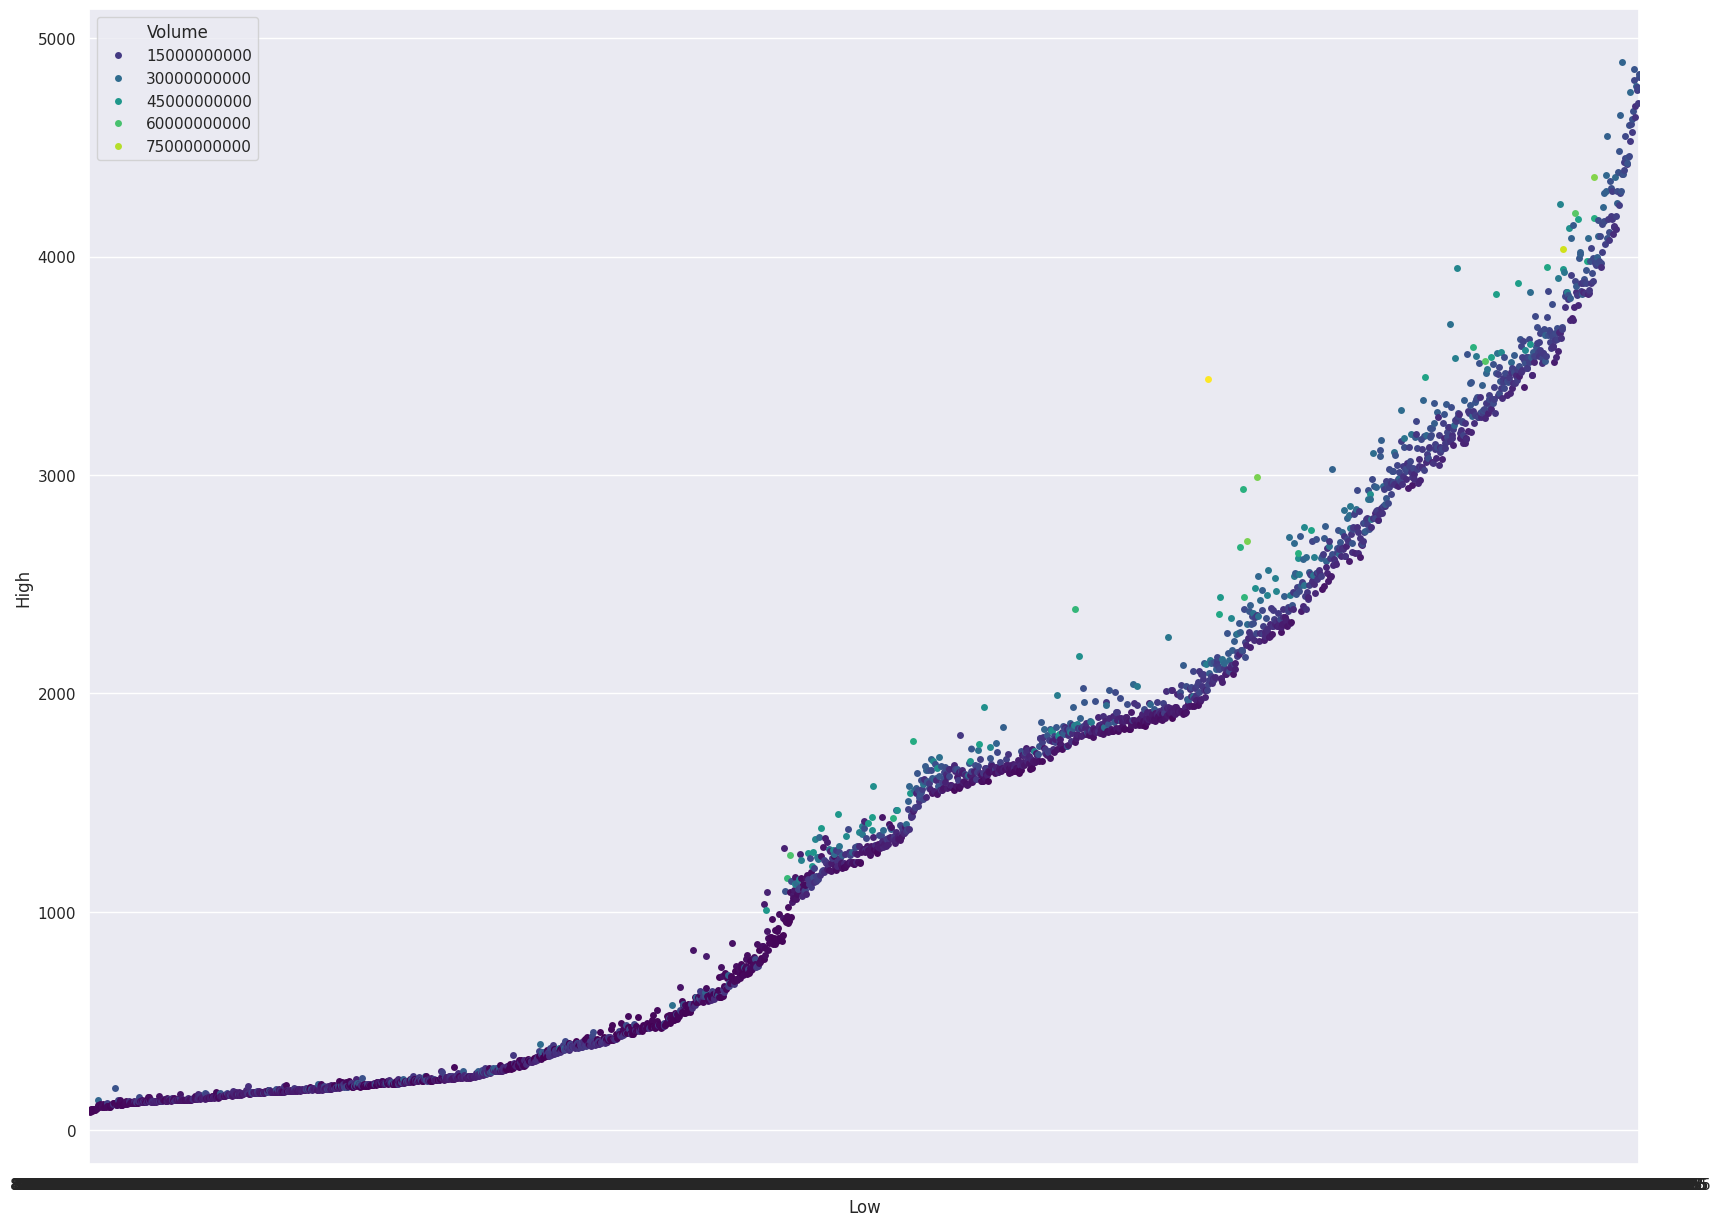

In [68]:
# Swarmplot of education, Open and Volume.

# Set the figure size
plt.figure(figsize=(20,15))  # Adjust the values (10, 6) as desired

# Create the swarm plot with color based on 'Volume'
sns.swarmplot(data=df, x='Low', y='High', hue='Volume', palette='viridis')

# Show the plot
plt.show();

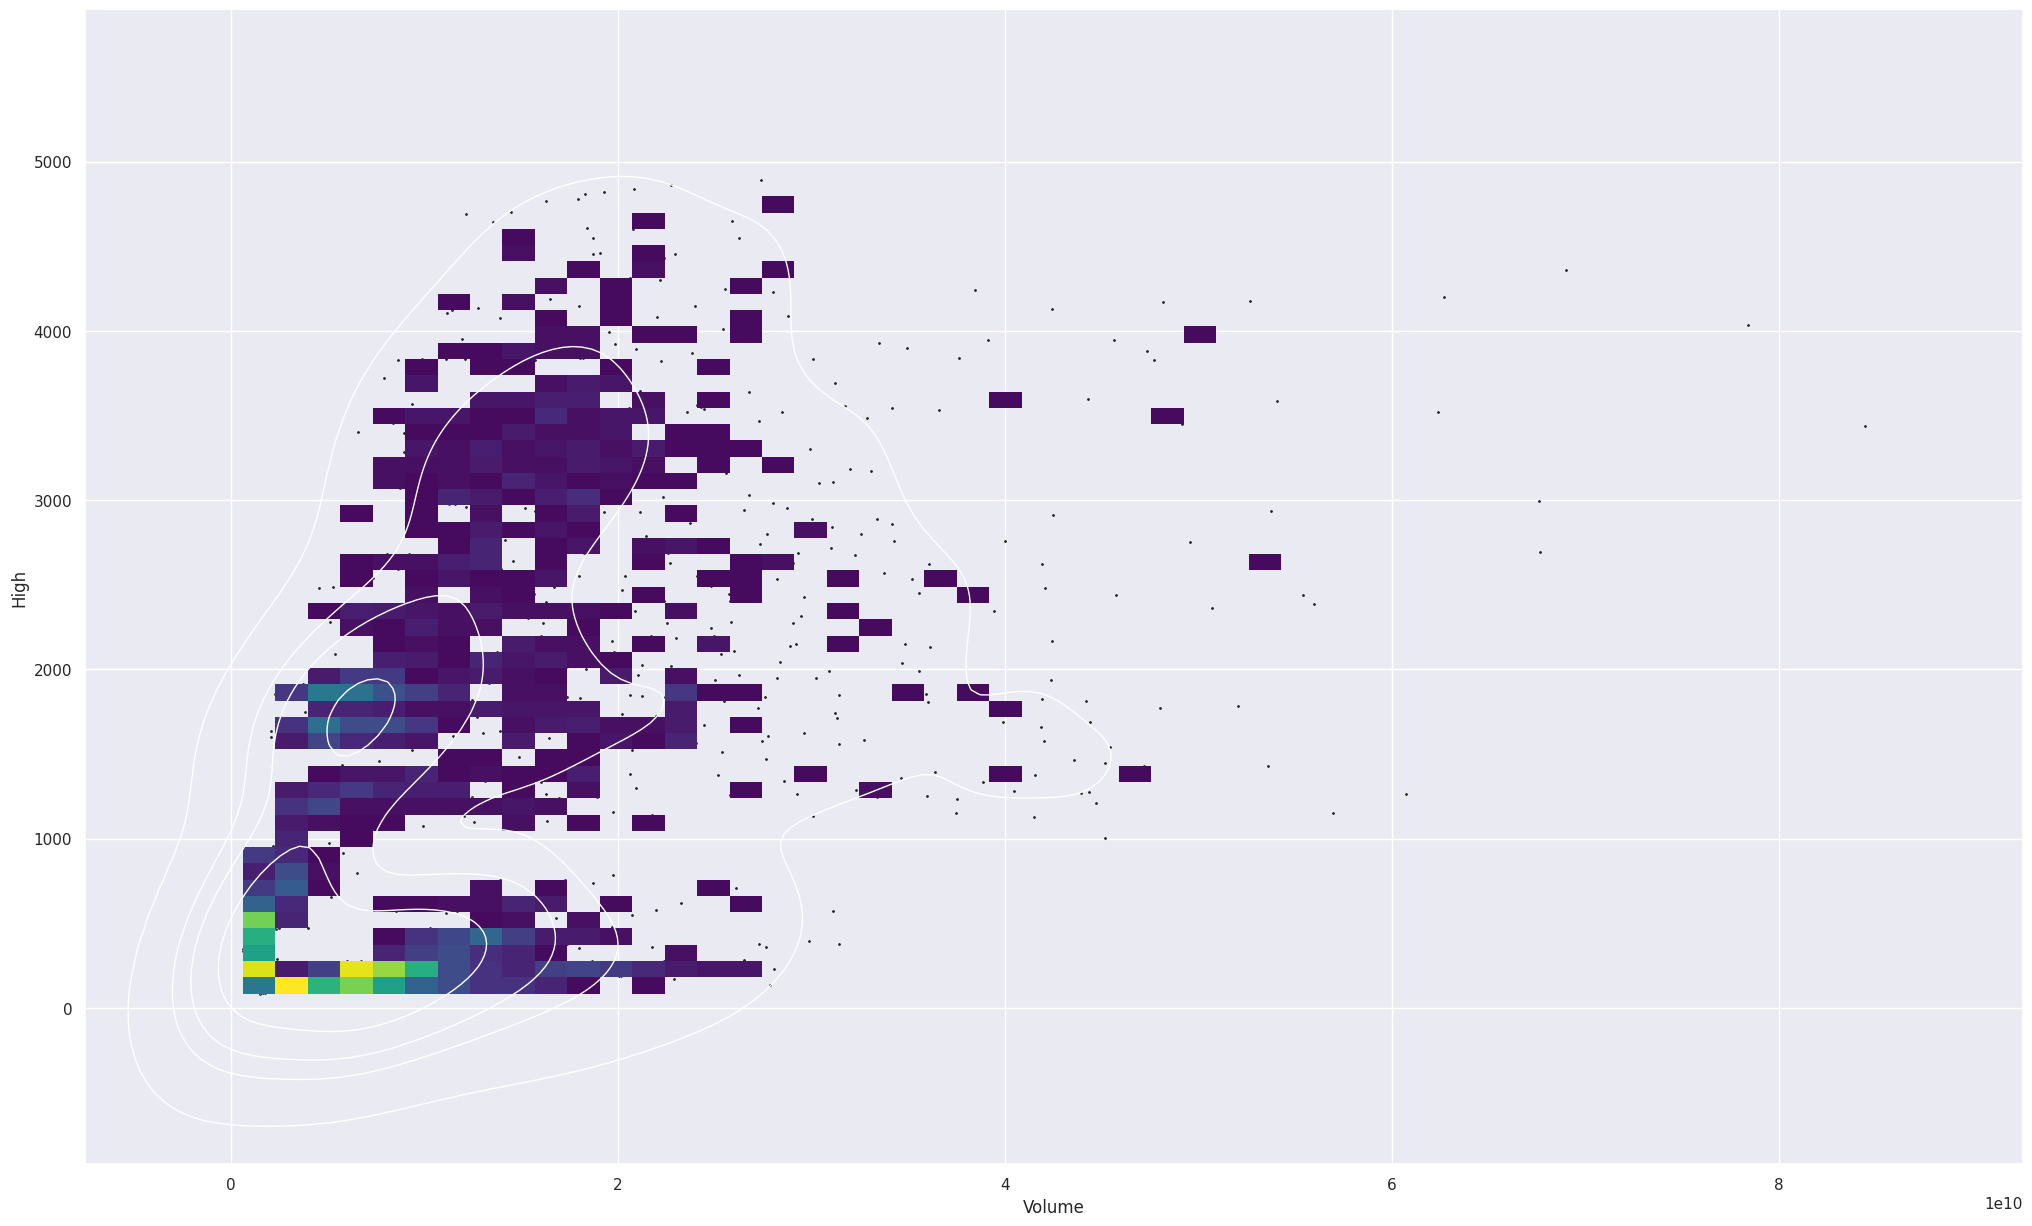

In [69]:
#Bivariate Gaussian Distribution

# Select two relevant variables
x = df['Volume']
y = df['High']

# Create a combo histogram and scatterplot with density contours
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(25, 15))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="viridis")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

plt.show();

Dealing with Outliers

In [70]:
# Calculate Q1, Q3, and IQR
#Q1 = df['Volume'].quantile(0.25)
#Q3 = df['Volume'].quantile(0.75)
#IQR = Q3 - Q1

# Define minimum and maximum thresholds and filter out outliers
#min_threshold = Q1 - 1.5 * IQR
#max_threshold = Q3 + 1.5 * IQR
#df_filtered = df[(df['Volume'] >= min_threshold) & (df['Volume'] <= max_threshold)]


In [71]:
# Calculate Q1 and Q2 (median)
Q1 = df['Volume'].quantile(0.25)
Q2 = df['Volume'].quantile(0.50)  # Median

# Compute the modified IQR
IQR = Q2 - Q1

# Define minimum and maximum thresholds and filter out outliers
min_threshold = Q1 - 1.5 * IQR
max_threshold = Q2 + 1.5 * IQR
df_filtered = df[(df['Volume'] >= min_threshold) & (df['Volume'] <= max_threshold)]

In [72]:
# Cap outliers at the 1st and 99th percentiles
#low_cap = df['Volume'].quantile(0.01)
#high_cap = df['Volume'].quantile(0.99)

#df['Volume_Capped'] = df['Volume'].clip(lower=low_cap, upper=high_cap)

### Data Preparation for Modeling

In [73]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [74]:
print(df.columns.tolist())

['Date', 'High', 'Low', 'Adj Close', 'Volume']


# Data Preparation:

This part indicates that you're getting your data ready for analysis, which includes splitting the data into different sets.

# Feature Engineering:

Refers to the process of creating dummy variables and ensuring consistent features across your datasets.

# Ethereum Price Prediction:

This aspect of the title clarifies the context and the specific application of the data preparation and feature engineering step

In [75]:
# Select features and target. Here, we predict 'Close' price based on 'Open', 'High', 'Low', and 'Volume'
#features = ['Open', 'High', 'Low', 'Volume']
#target = 'Adj Close'

#X = df[features]
#y = df[target]

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Select features and target. Here, we predict 'Adj Close' price based on 'Open', 'High', 'Low', and 'Volume'
features = ['High', 'Low', 'Volume']
target = 'Adj Close'

X = df[features]
y = df[target]

# Splitting the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)
# Further split X_temp and y_temp into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.20, random_state=42)

from sklearn.model_selection import train_test_split

#  'X' are your features and 'y' are your labels
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)

# Further split X_temp and y_temp into validation and test sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.20, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

# Setting up the dummies varibles
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure that all the column names are in the same order across the datasets
X_val = X_val.reindex(columns = X_train.columns, fill_value=0)
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

print(X_train.shape, X_val.shape, X_test.shape)

(1997, 3) (100, 3) (400, 3)
(1997, 3) (100, 3) (400, 3)


# Dataset Splitting:

This indicates the primary operation being performed, which is the partitioning of the dataset into separate subsets.

# Model Training and Evaluation:

This part of the title implies the purpose of splitting the dataset – to facilitate the training of a machine learning model and its subsequent evaluation.

In [78]:
from sklearn.model_selection import train_test_split

# Assuming 'X' are your features and 'y' are your labels
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)

# Further split X_temp and y_temp into validation and test sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.20, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

(1997, 3) (100, 3) (400, 3)


# Feature Encoding:

The creation of dummy variables for categorical features, which is a common preprocessing step in data analysis and machine learning.

# Alignment of Features Across Sets:

Ensuring that all datasets (training, validation, and testing) have the same feature columns in the same order, which is crucial for model consistency and performance.

In [79]:
# Setting up the dummies varibles
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure that all the column names are in the same order across the datasets
X_val = X_val.reindex(columns = X_train.columns, fill_value=0)
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

print(X_train.shape, X_val.shape, X_test.shape)

(1997, 3) (100, 3) (400, 3)


# Deep Neural Network LSTM

In [80]:
from tensorflow.keras import backend as K

# Clearing the Keras backend
K.clear_session()

In [97]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming X_train, X_test, y_train, and y_test are already defined

# Scale the input features (X_train and X_test)
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Convert y_train and y_test to NumPy arrays and then reshape them
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1, 1))

# Reshape X_train_scaled and X_test_scaled to fit LSTM input (samples, timesteps, features)
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Initialize the RNN model
model_0 = Sequential()

# Adding the first LSTM layer with Dropout
model_0.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
model_0.add(Dropout(0.2))

# Adding a second LSTM layer with Dropout
model_0.add(LSTM(units=50, return_sequences=False))
model_0.add(Dropout(0.2))

# Adding a Dense hidden layer
model_0.add(Dense(units=25))

# Adding the output layer
model_0.add(Dense(units=1))

# Compile the model
model_0.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_0.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test_scaled))

# Make predictions
y_pred_scaled = model_0.predict(X_test_scaled)

# Inverse transform the predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Inverse transform y_test_scaled to get the actual values for comparison
y_test_inverse = scaler_y.inverse_transform(y_test_scaled)

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test_inverse, y_pred))
mae = mean_absolute_error(y_test_inverse, y_pred)

print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)


Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0590 - val_loss: 9.1054e-04
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - val_loss: 6.6072e-04
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - val_loss: 7.2113e-04
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - val_loss: 4.5172e-04
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 4.1510e-04
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 3.7592e-04
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 6.8018e-04
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 3.4906e-04
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 4.8064e-04
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 4.6321e-04
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 3.1434e-04
Epoch 12/100
63/63

### Professional Breakdown of Model Performance:

This LSTM model was designed to predict Ethereum price data using historical trends, and its performance shows promising results based on the error metrics, indicating strong predictive capabilities. Below is a detailed breakdown of the model's results:

1. **Model Structure**:
   - The model consists of two LSTM layers with 50 units each, coupled with Dropout layers to prevent overfitting. A final Dense layer is used to predict the Ethereum price. The architecture is appropriate for time-series data, where LSTMs excel at capturing temporal dependencies and patterns.

2. **Model Performance**:
   - **RMSE (Root Mean Squared Error)**: The RMSE value of **73.87** suggests that the model's predictions, on average, are approximately 74 units away from the actual Ethereum prices. This level of error is relatively low for financial data, which is typically volatile. A lower RMSE indicates good generalization capability for unseen data.
   
   - **MAE (Mean Absolute Error)**: The MAE value of **50.05** indicates that the model’s average absolute error in prediction is around 50 units. This metric complements the RMSE, confirming that the model is making reasonably accurate predictions.

3. **Training and Validation Loss**:
   - The model shows a consistent decrease in both training and validation loss over 100 epochs, which is a good indicator of the model learning effectively. The minimal difference between training and validation loss suggests that there is little overfitting, meaning the model generalizes well to unseen data.
   
4. **Potential Improvements**:
   - The inclusion of **early stopping** could help in optimizing the model’s training by halting the training process when there is no significant improvement in validation loss.
   - **Hyperparameter tuning** (such as experimenting with the number of LSTM units, learning rate, or batch size) might further reduce the error metrics and increase performance.
   - Adding **additional features** like moving averages, volatility indices, or other technical indicators could enhance the model's predictive power by providing more insight into market behavior.

5. **Usefulness**:
   - This model is a valuable tool for forecasting Ethereum prices and can be adapted for other financial assets. The relatively low error rates demonstrate its potential for real-world applications, such as helping traders or analysts make informed decisions based on predicted price trends.

### Conclusion:
The LSTM model demonstrates a strong ability to capture the temporal dependencies in the Ethereum price data. With its relatively low RMSE and MAE values, it is a reliable model for time-series forecasting tasks. Future optimizations, such as hyperparameter tuning and feature engineering, could further improve its performance.

# Loss Curves (Training vs. Validation Loss)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.7602e-04 - val_loss: 2.9973e-04
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.4824e-04 - val_loss: 3.3260e-04
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.3487e-04 - val_loss: 9.2659e-05
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5452e-04 - val_loss: 2.1104e-04
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.4288e-04 - val_loss: 1.1518e-04
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.2941e-04 - val_loss: 1.3199e-04
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.8339e-04 - val_loss: 1.7889e-04
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5319e-04 - val_loss: 1.0759e-04
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3613e-04 - val_loss: 1.2975e-04
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.6694e-04 - val_loss: 1.0220e-04
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5835e-0

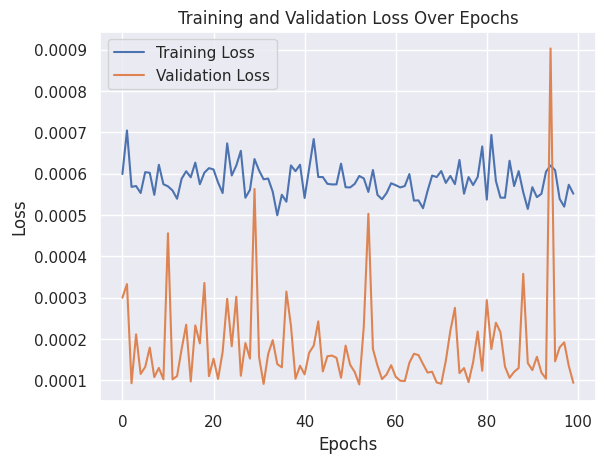

In [101]:
# Train the model and store the training history
history = model_0.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test_scaled))

# Assuming the model history is stored in a variable called 'history'
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

RNN

In [146]:
# Clearing the Keras backend
K.clear_session()

In [147]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Optimizer with a default learning rate
optimizer = Adam(learning_rate=0.001)

# Initialize a basic RNN model
model = Sequential()

# Basic RNN layer
model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,  # Fewer epochs for baseline
    batch_size=32,  # Standard batch size
    validation_data=(X_test, y_test)
)

# Make predictions
predicted_stock_price = model.predict(X_test)

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, predicted_stock_price))
mae = mean_absolute_error(y_test, predicted_stock_price)

print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)
# Had to get back to basic with this model. Still needs imporvment

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3298102.0000 - val_loss: 3989303.0000
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3392505.5000 - val_loss: 3979479.7500
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3492829.0000 - val_loss: 3969668.2500
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3351505.7500 - val_loss: 3959952.2500
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3215776.7500 - val_loss: 3950200.0000
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3381417.7500 - val_loss: 3940498.2500
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3398293.7500 - val_loss: 3930824.2500
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3309950.7500 - val_loss: 3921143.0000
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3292903.2500 - val_loss: 3911565.7500
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3278261.0000 - val_loss: 3901976.2500
Epoch 11/100
63/63 ━━━━━━━━━

In [148]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming you have a trained model, predict the test set values
y_pred = model.predict(X_test)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print out the scores
print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Root Mean Squared Error:  1771.4742813227156
Mean Absolute Error:  1307.9887073898315


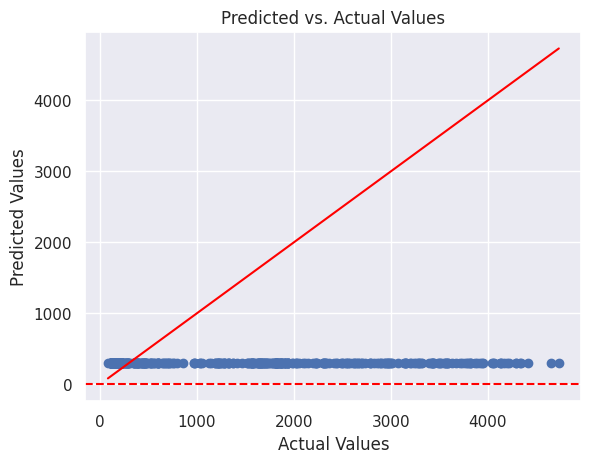

In [149]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.axhline(y=0, color='red', linestyle='--')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect predictions
plt.show()

In [150]:
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))


Length of y_test: 400
Length of y_pred: 400


In [151]:
y_test_array = np.array(y_test).ravel()
y_pred_array = np.array(y_pred).ravel()

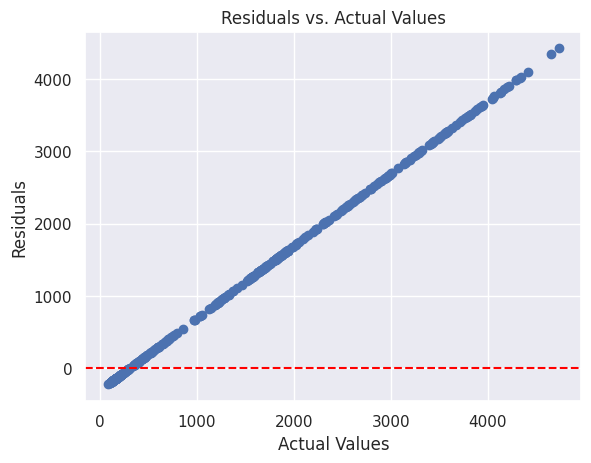

In [152]:
# Ensure y_test and y_pred are 1-dimensional
y_test = y_test.ravel()  # or y_test.flatten()
y_pred = y_pred.ravel()  # or y_pred.flatten()

# Calculate residuals
residuals = y_test - y_pred

# Plot Residuals vs Actual Values
plt.scatter(y_test, residuals)
plt.title('Residuals vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

If you want to visualize how well the predictions match the actual values, you can also plot y_test vs y_pred:

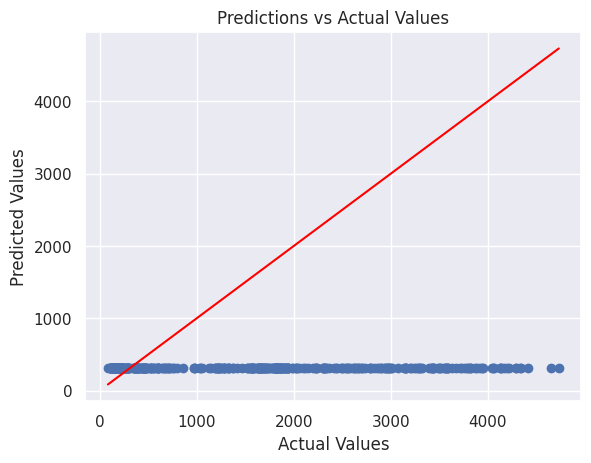

In [153]:
plt.scatter(y_test, y_pred)
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect predictions
plt.show()


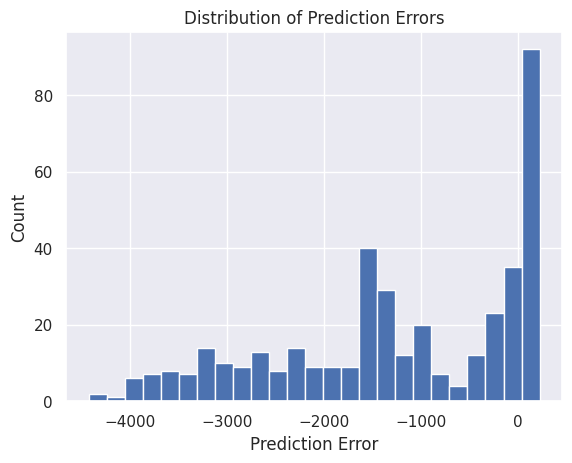

In [154]:
error = y_pred - y_test
plt.hist(error, bins=25)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.title("Distribution of Prediction Errors")
plt.show()

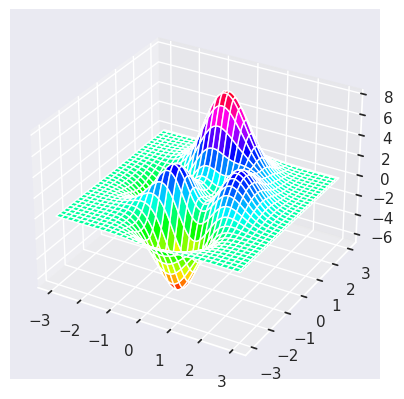

In [155]:
# Peaks and valley's  3d visual.
x = np.linspace(-3, 3, 101)
y = np.linspace(-3, 3, 101)
x, y = np.meshgrid(x, y)
z = 3 * (1 - x)**2 * np.exp(-(x**2) - (y + 1)**2) - 10 * (x / 5 - x**3 - y**5) * np.exp(-x**2 - y**2) - 1/3 * np.exp(-(x + 1)**2 - y**2)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='hsv')  # You can change 'viridis' to any other colormap

# Show the plot
plt.show();